# Principal Component Analysis (PCA)
### Dataset: [A3-data.txt](../../input/A3-data.txt)

<a id="1"></a>
## Import modules

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<a id="2"></a>
## Loading dataset

In [4]:
filename = '../../input/A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]


<a id="3"></a>
## Standardize the data

In [5]:
features = ['x', 'y', 'z', 't']
target = ['class']

x = df.loc[:, features].values

y = df.loc[:, target].values

x = StandardScaler().fit_transform(x)

<a id="4"></a>
## PCA Projection to 2D

In [6]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])


print("original shape:   ", x.shape)
print("transformed shape:", principal_components.shape)

print(principal_df)

final_df = pd.concat([principal_df, df[['class']]], axis = 1)

print(final_df)

print("Synthetic A3 Dataset - Unique Classes:", df['class'].unique())
print("Synthetic A3 Dataset - Shape of PCA Data:", df.shape)


original shape:    (360, 4)
transformed shape: (360, 2)
     principal component 1  principal component 2
0                -1.615413              -0.461632
1                 0.499510               0.700627
2                 0.603876              -0.296531
3                -0.726266               0.649637
4                 0.633048               0.427483
..                     ...                    ...
355               1.071133               1.419143
356               0.404593               0.104707
357              -2.159519               0.628094
358              -2.000091              -0.313355
359               0.847054              -0.846901

[360 rows x 2 columns]
     principal component 1  principal component 2  class
0                -1.615413              -0.461632      1
1                 0.499510               0.700627      5
2                 0.603876              -0.296531      2
3                -0.726266               0.649637      1
4                 0.633048         

<a id="5"></a>
## Explained Variance

In [7]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.25891367 0.95489232]
[0.31385417 0.23805996]


<a id="6"></a>
## Visualize 2D Projection

[1, 2, 3, 4, 5, 6]


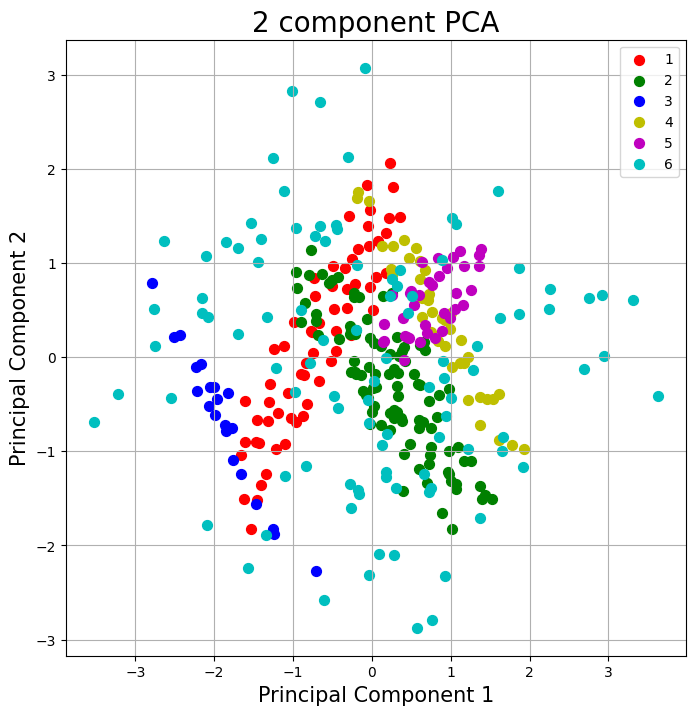

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = sorted(df['class'].unique())
print(targets)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['class'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()